In [10]:
%load_ext lab_black

The lab_black extension is already loaded. To reload it, use:
  %reload_ext lab_black


In [11]:
from cartes.osm import Overpass


data = dict(
    (
        name,
        Overpass.request(area=dict(name=name, admin_level=8), way=dict(building=True)),
    )
    for name in ["Brugge", "Venezia"]
)

In [12]:
data["Brugge"].data.shape, data["Venezia"].data.shape

((75064, 321), (50515, 258))

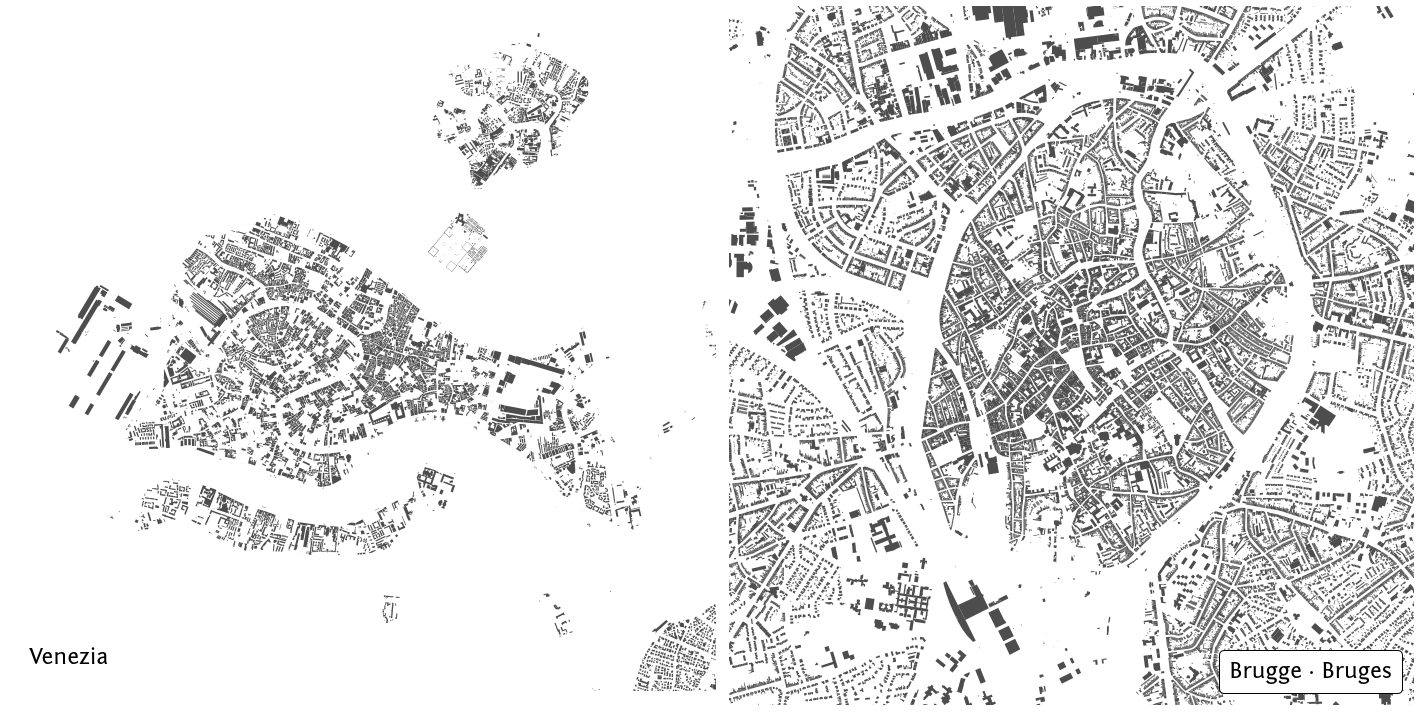

In [13]:
import matplotlib.pyplot as plt
from matplotlib.offsetbox import AnchoredText

from cartes.crs import Amersfoort, EPSG_6875


fig = plt.figure(figsize=(20, 10))

ax = fig.add_subplot(121, projection=EPSG_6875())
data["Venezia"].plot(ax, facecolor="0.3")
ax.spines["geo"].set_visible(False)

text = AnchoredText(
    "Venezia",
    loc=3,
    frameon=False,
    prop={"size": 24, "fontname": "Fontin Sans"},
)
ax.add_artist(text)
ax.set_extent((12.2979, 12.3744, 45.4129, 45.4639))


ax = fig.add_subplot(122, projection=Amersfoort())
data["Brugge"].plot(ax, facecolor="0.3")
ax.spines["geo"].set_visible(False)

text = AnchoredText(
    "Brugge · Bruges",
    loc=4,
    frameon=True,
    prop={"size": 24, "fontname": "Fontin Sans"},
)
text.patch.set_boxstyle("round,pad=0.,rounding_size=0.2")
ax.add_artist(text)
ax.set_extent((3.1995, 3.2486, 51.1932, 51.2247))


fig.set_tight_layout(True)
fig.savefig("challenge_day3.png", dpi=300, facecolor="white")